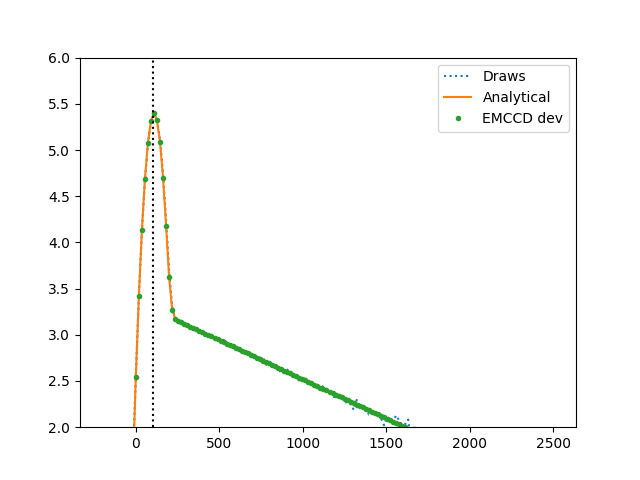

/Users/Vincent/opt/anaconda3/envs/py38/lib/python3.8/site-packages/astropy/convolution/kernels.py:97: RuntimeWarning: divide by zero encountered in double_scalars
  self._model = models.Gaussian1D(1.0 / (np.sqrt(2 * np.pi) * stddev), 0, stddev)
/Users/Vincent/opt/anaconda3/envs/py38/lib/python3.8/site-packages/astropy/modeling/functional_models.py:213: RuntimeWarning: divide by zero encountered in divide
  return amplitude * np.exp(-0.5 * (x - mean) ** 2 / stddev**2)
/Users/Vincent/opt/anaconda3/envs/py38/lib/python3.8/site-packages/astropy/modeling/functional_models.py:213: RuntimeWarning: invalid value encountered in divide
  return amplitude * np.exp(-0.5 * (x - mean) ** 2 / stddev**2)
/Users/Vincent/opt/anaconda3/envs/py38/lib/python3.8/site-packages/astropy/modeling/functional_models.py:213: RuntimeWarning: invalid value encountered in multiply
  return amplitude * np.exp(-0.5 * (x - mean) ** 2 / stddev**2)
/Users/Vincent/Github/pyds9plugin/pyds9plugin/Macros/Fitting_Functions/fun

In [1]:
%matplotlib ipympl

import mpl_interactions.ipyplot as iplt
import matplotlib.pyplot as plt
import numpy as np
from pyds9plugin.Macros.Fitting_Functions.functions import EMCCD, EMCCDhist,EMCCD_smearing_old, EMCCD_dev#, EMCCD_dev_wo
x = np.linspace(-200,2500,150)
bias=100
fig, ax = plt.subplots()
# pushing the limits:
# controls = iplt.plot(x,  EMCCDhist, bias=100, RN=np.linspace(30,100),EmGain=np.linspace(500,2000),flux=np.linspace(0.05,4), smearing=np.linspace(0,3),sCIC=np.linspace(0,1),ls=":", ylim=[2,6], label="Draws")
# under control:

def EMCCD_dev_wo(x,bias,RN,EmGain,flux,smearing,sCIC,test=False):
    return EMCCD_dev(x,bias,RN,EmGain,flux,smearing,sCIC,test=test)

controls = iplt.plot(x,  EMCCDhist, bias=bias, RN=np.linspace(30,100),EmGain=np.linspace(500,2000),flux=np.linspace(0.05,1), smearing=np.linspace(0,1),sCIC=np.linspace(0,1),ls=":", ylim=[2,6], label="Draws")
iplt.plot(x, EMCCD,controls=controls, ylim=[2,6],label="Analytical")
iplt.plot(x, EMCCD_dev, ".", controls=controls, ylim=[2,6], label="EMCCD dev")
# iplt.plot(x, EMCCD_dev_wo,  ".", controls=controls, ylim=[2,6], label="EMCCD dev")
_ = plt.legend()
plt.plot([bias,bias],[2,6],":k")
plt.legend()
plt.show()




# Erreurs à corriger
- vol 2018 fit du smearing à 3 au lieu de 1.5
- sCIC comprendre pk j'ai du ajouter 2 facteurs et ca ne fit pas totalement
- A faible flux, smearing =1 ne fait rien. Sans doute parceque il faudrait simuler sur le deuxieme pixel
- quand trop de smearing je baisse trop le gain... parce que je ne devrais appliquer 
  - en fait il faudrait prendre en compte le flux. car quand trop de flux, les pixels bavent sur ceux qui on aussi recu des photo electrons et donc le gain baisse moins. 
  - Malheureusement ca ne revient pas au meme que d'appliquer moins de smearing je pense. Il faut vraiment re distribuer pas que aux 0 mais aussi aux 1. 
  - Il faudrait sans doute multiplier par 1+le pourcentage de pixels qui sont affectés deux fois par des electrons.
    - En effet ca aide pour garder le 0 à sa place mais il faudrait neamoins diminuer le gain